In [28]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [29]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [30]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [31]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [32]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [33]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [34]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [35]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [39]:
# Find the most recent date in the data set.
latest_dt =session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print("Date is", latest_dt)

Date is ('2017-08-23',)


<function matplotlib.pyplot.show(close=None, block=None)>

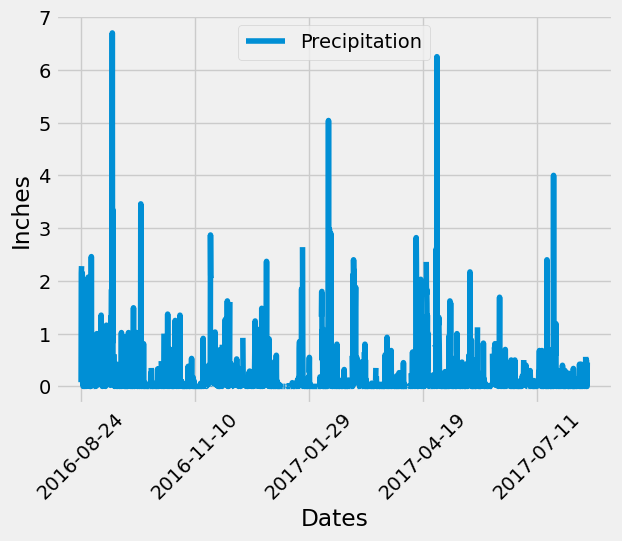

In [55]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
yr_prcp = session.query(Measurement.prcp , Measurement.date).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()
yr_prcp
# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names

df = pd.DataFrame(yr_prcp, columns = ['Precipitation', 'Dates'])
df.set_index('Dates')
# Sort the dataframe by date
df_dates = df.sort_values(by = 'Dates')

# Use Pandas Plotting with Matplotlib to plot the data
df_dates.plot(x = 'Dates', grid = True)
plt.ylabel ('Inches')
plt.xticks(rotation = 45)
plt.show


In [47]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_dates.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [48]:
# Design a query to calculate the total number of stations in the dataset
station_m = session.query(func.count(Measurement.station)).all()
station_m

[(19550,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
max_stations = session.query( Measurement.station , func.count(Measurement.station)).group_by( Measurement.station ).\
               order_by(func.count(Measurement.station).desc()).all()

max_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [50]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_active_station = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                      filter(Measurement.station == 'USC00519281' ).all()
print(temp_active_station)

[(54.0, 85.0, 71.66378066378067)]


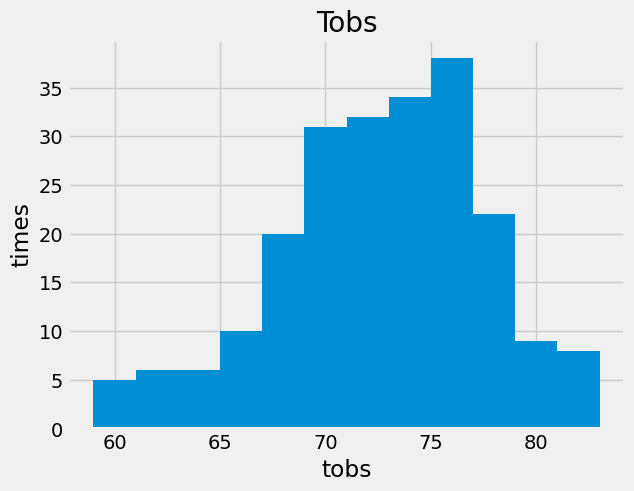

In [53]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_acti_station =  session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281' ).filter(Measurement.date >= '2017,8,23').all()
temp_acti_station_df = pd.DataFrame(temp_acti_station , columns = ['Tobs'])
temp_acti_station_df.hist( bins = 12)
plt.xlabel('tobs')
plt.ylabel('times')
plt.show()

# Close Session

In [54]:
# Close Session
session.close()